#🔑 Step 1: Install required connectors

In [1]:
%pip install mysql-connector-python pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#🛠 Step 2: Connect to MySQL

In [2]:
import mysql.connector
import pandas as pd

# connect to MySQL
conn = mysql.connector.connect(
    host="localhost",        # or server IP
    user="root",             # your MySQL username
    password="OnePieceIsReal",
    database="banking_case" # your database name
)

# make cursor if you want to run raw SQL
cursor = conn.cursor()
cursor.execute("SHOW TABLES;")
print(cursor.fetchall())


[('banking-realtionships',), ('customers',), ('gender',), ('investment-advisiors',)]


#🛠 Step 3: Load data into Pandas

In [3]:
query = "SELECT * FROM CUSTOMERS;"
df = pd.read_sql(query, conn)

df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7196\1599756277.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,6/5/2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10/12/2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


#EDA(Exploratory Data Analysis)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df.shape

(3000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

# Generating Descriptive Statistics

In [7]:
df.describe().astype(int)

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,IAId
count,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
mean,51,21563,171305,25531,1,3176,591386,671560,321092,232908,29883,866759,1,2,2,10
std,19,12462,111935,16259,0,2497,457557,645716,282079,230007,23109,641230,1,1,1,5
min,17,12,15919,1482,1,1,0,0,0,0,45,0,0,1,1,1
25%,34,10803,82906,12513,1,1236,239628,204400,119947,74794,11916,374825,1,1,2,5
50%,51,21129,142313,22357,1,2560,479793,463316,242815,164086,24341,711314,2,2,3,10
75%,69,32054,242290,35464,2,4522,825813,942754,434874,315575,41966,1185110,2,3,3,15
max,85,43369,522330,75963,3,13991,2667556,3890598,1969923,1724118,124704,3825961,3,5,4,22


## Key Insights from the Dataset

1. **Age Distribution**
   - Median age is 51, ranging from 17 to 85.
   - Most users are middle-aged to older adults.

2. **Income & Savings**
   - Median estimated income: 142,313; Mean: 171,305 → some high-income outliers exist.
   - Superannuation savings vary widely (median: 22,357, max: 75,963).

3. **Credit & Loans**
   - Most users have 1 credit card; max = 3. --> df['Amount of Credit Cards'].mode() = 1
   - Bank loans vary greatly (median: 479,793; max: 2,667,556).
   - Credit card balances are generally low, but some users carry high debt.

4. **Deposits & Business Lending**
   - Median bank deposits: 463,316; max: 3,890,598 → few users hold extreme wealth.

5. **Opportunities for Segmentation**
   - Users can be clustered based on income, age, and financial product engagement:
     - Low, medium, high income tiers
     - Young vs. older demographics


In [8]:
df['Estimated Income'].min()
df['Estimated Income'].max()

np.float64(522330.26)

#**Analysing Income Distribution**

In [9]:
# create bins
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Income Band'] = pd.cut(df['Estimated Income'], bins, labels=labels, right=False)

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # adjust width to prevent wrapping
df.head()


,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Income Band
0,IND81288,Raymond Mills,24,34324,6/5/2019,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1,Low
1,IND65833,Julia Spencer,23,42205,10/12/2001,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2,Medium
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3,Medium
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4,High
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5,Medium


<Axes: xlabel='Income Band'>

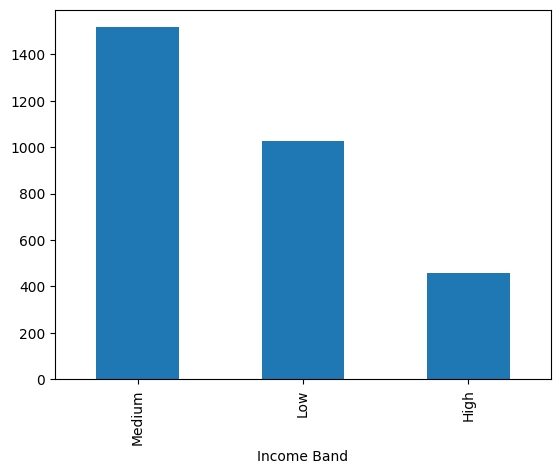

In [11]:
df['Income Band'].value_counts().plot(kind='bar')

#**Univariate Analysis**

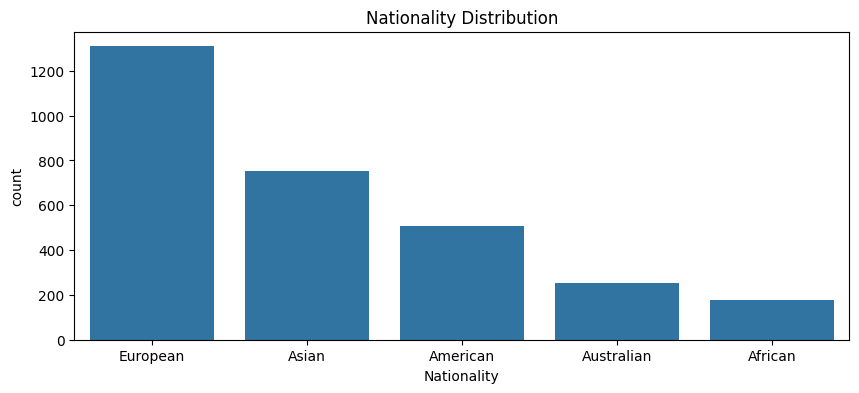

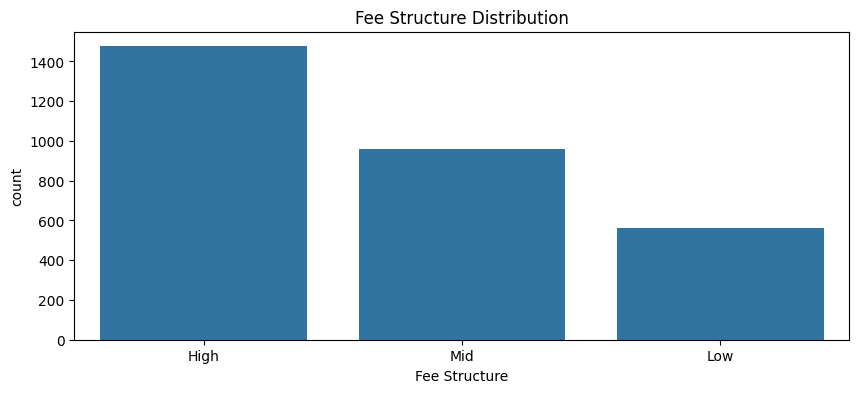

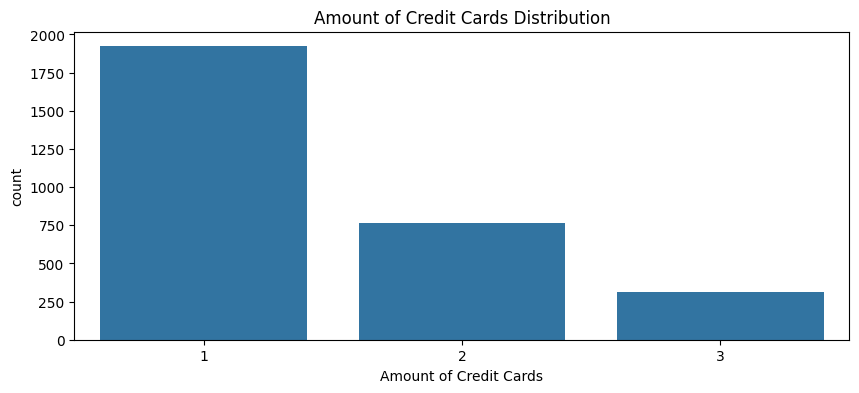

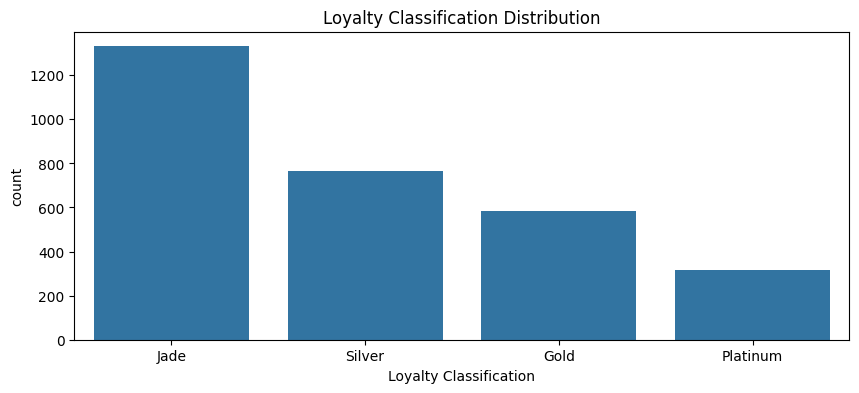

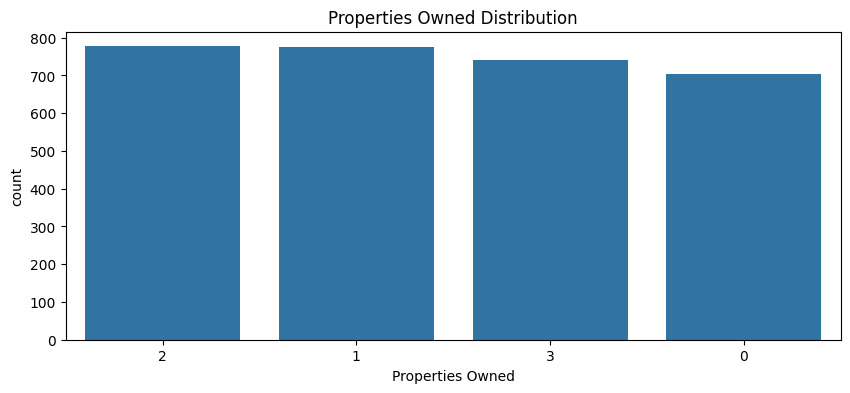

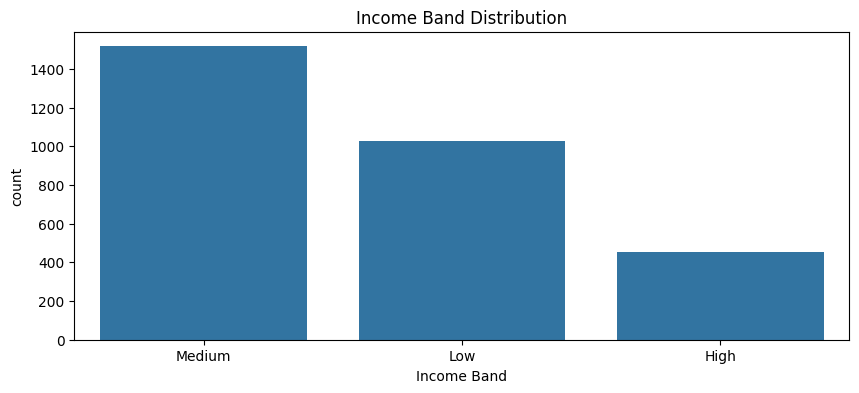

In [12]:
cat_cols = df[['Nationality','Fee Structure', 'Amount of Credit Cards', 'Loyalty Classification', 'Properties Owned', 'Income Band']]
cat_cols

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.show()

#**Bivariate Analysis**

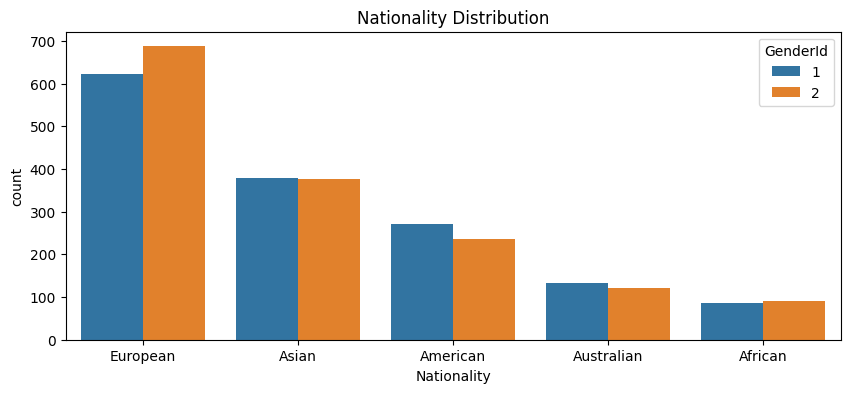

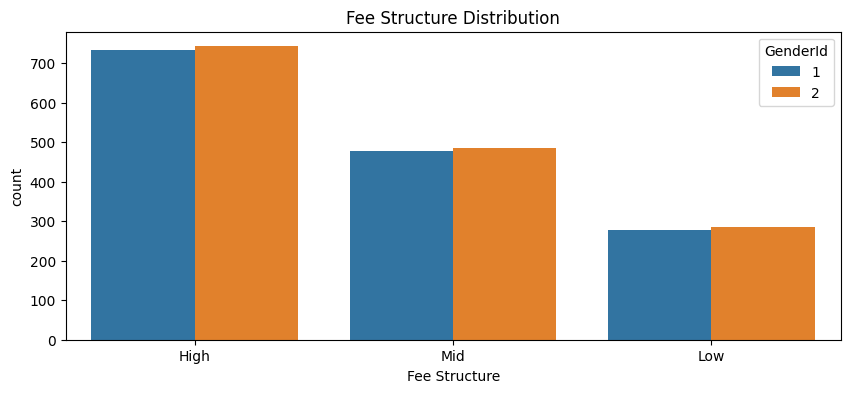

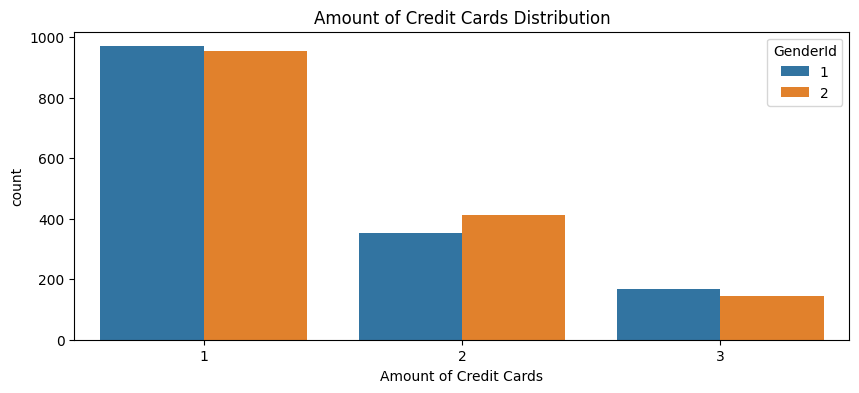

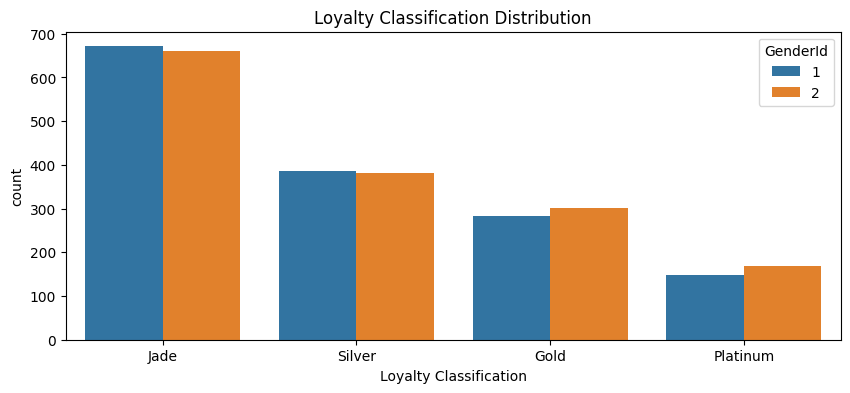

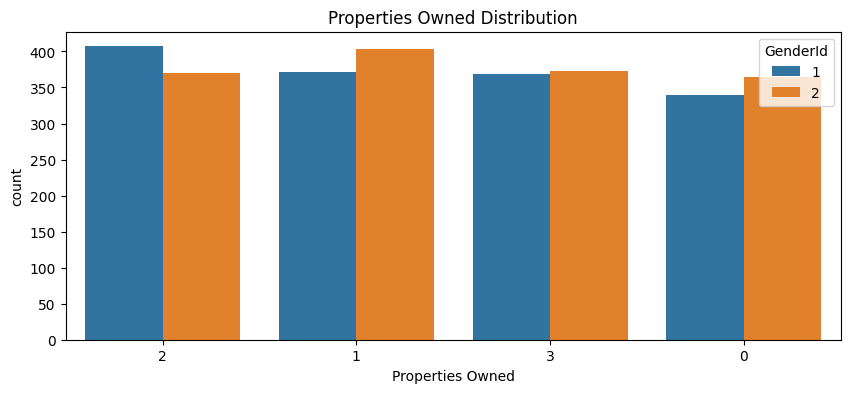

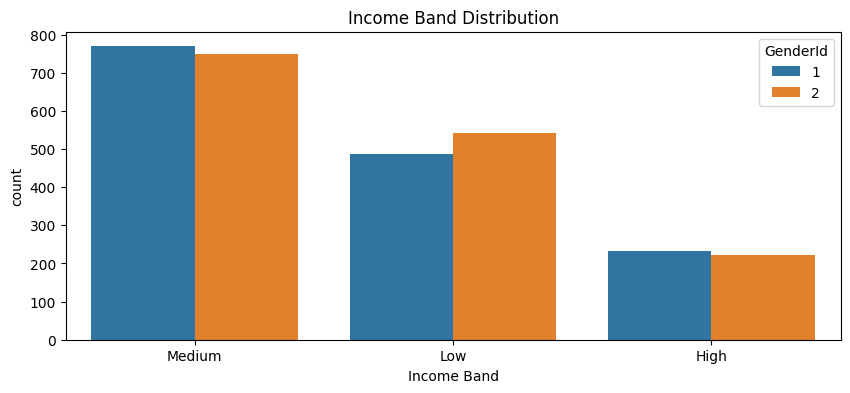

In [13]:
cat_cols = df[['Nationality','Fee Structure', 'Amount of Credit Cards', 'Loyalty Classification', 'Properties Owned', 'Income Band']]
cat_cols

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue='GenderId')
    plt.title(f'{col} Distribution')
    plt.show()

#Numerical Analysis

**Univariate Analysis**

#**Graphs below give you both distribution and outlier insight side by side.**

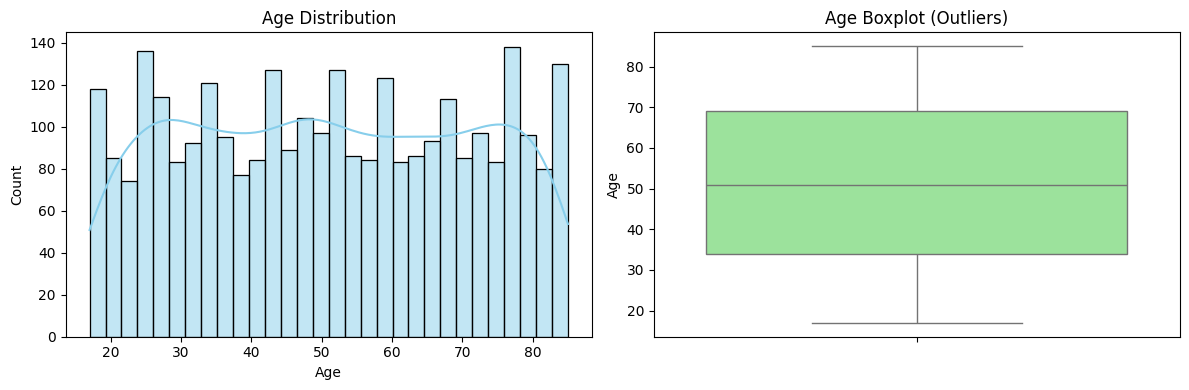

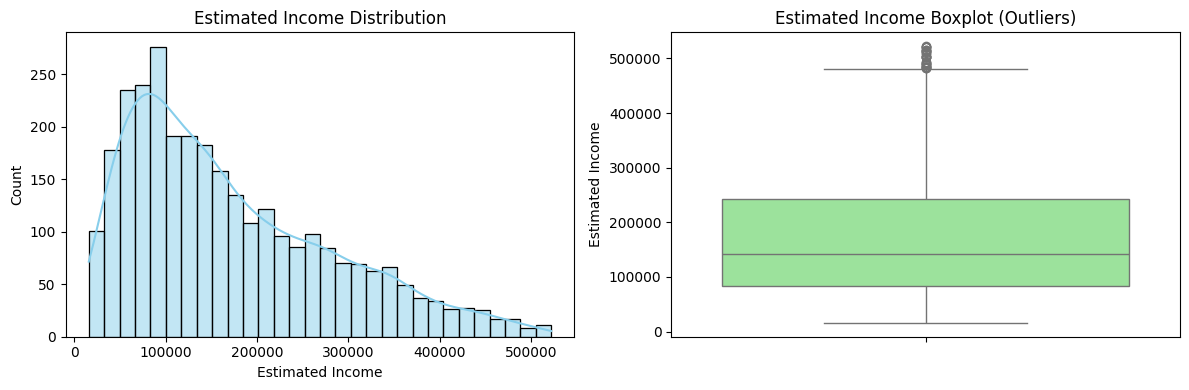

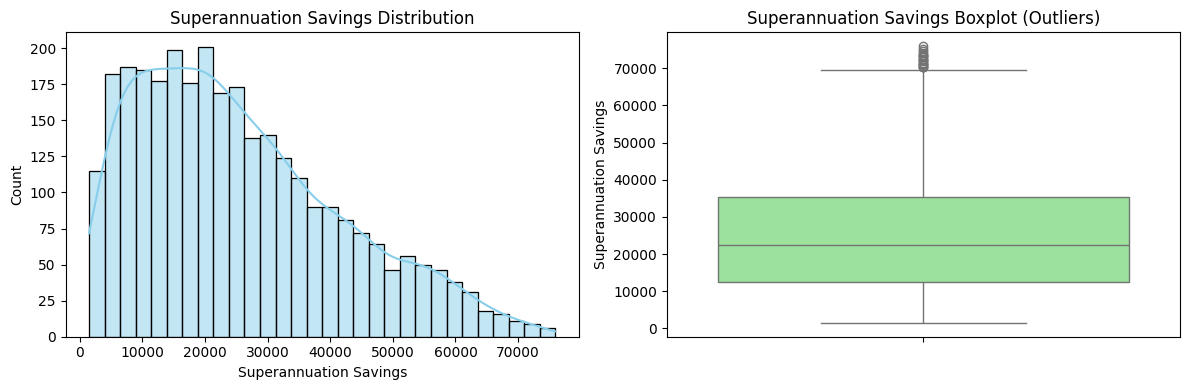

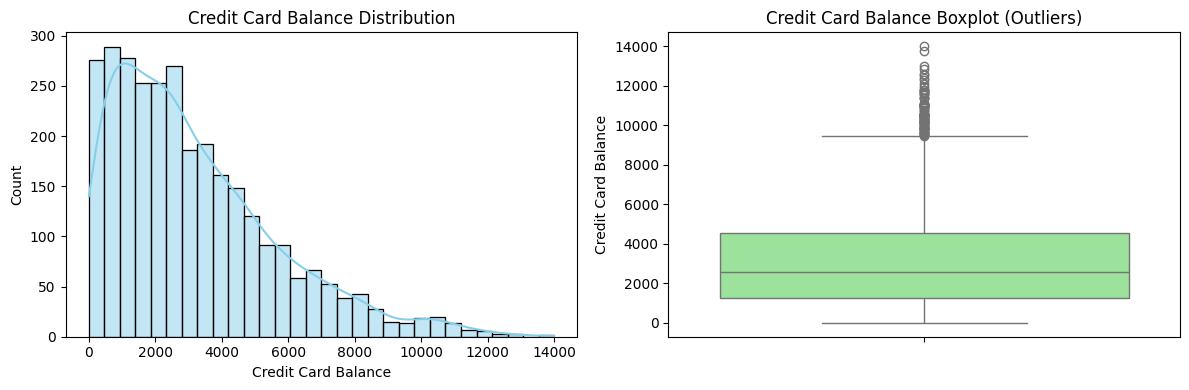

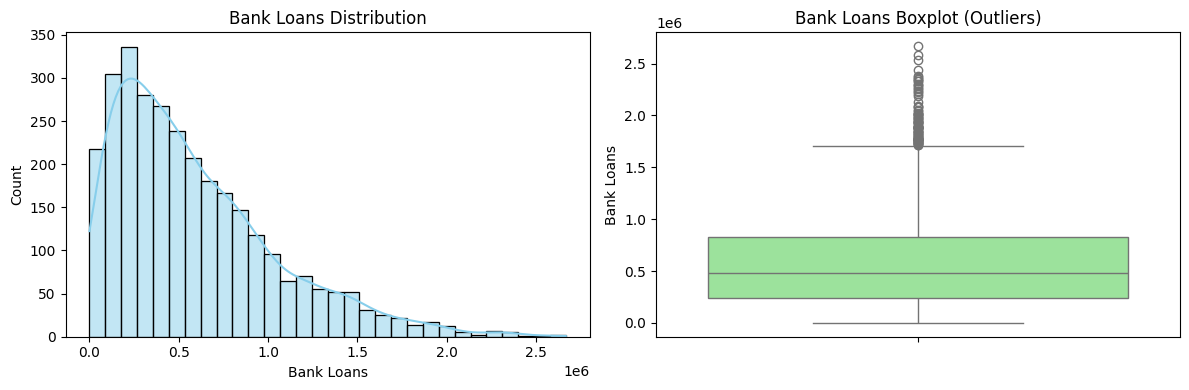

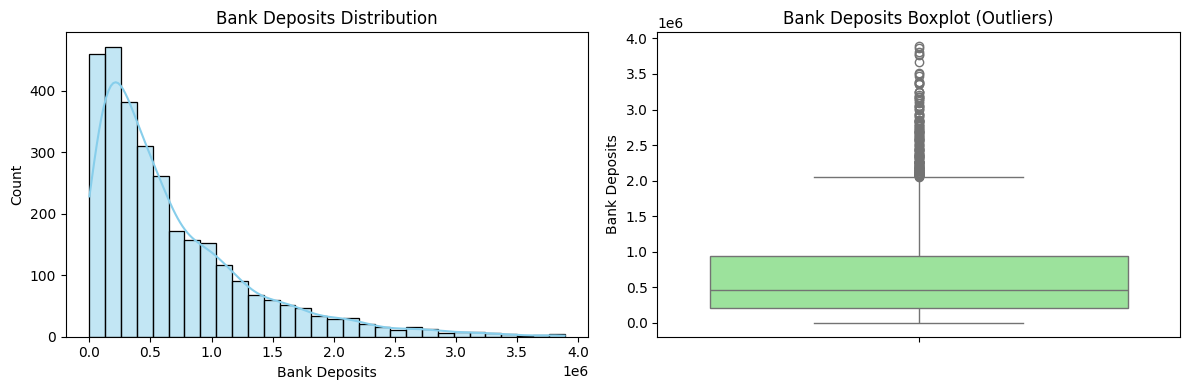

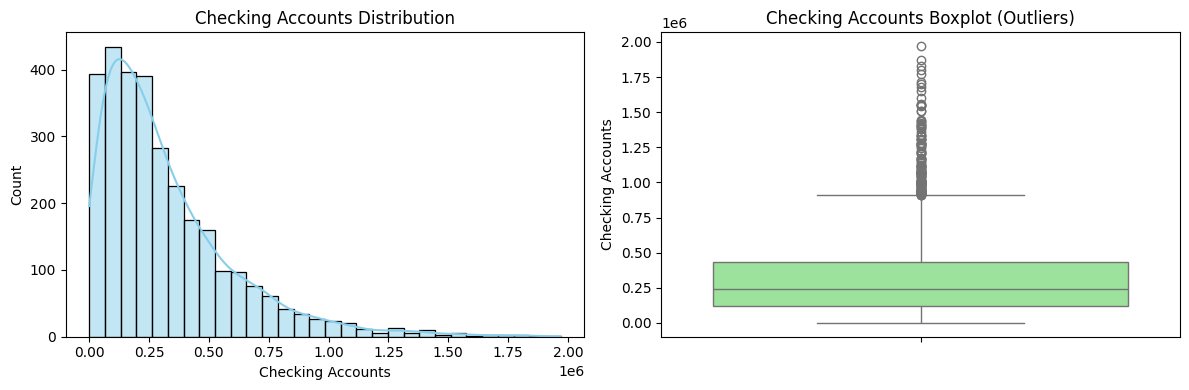

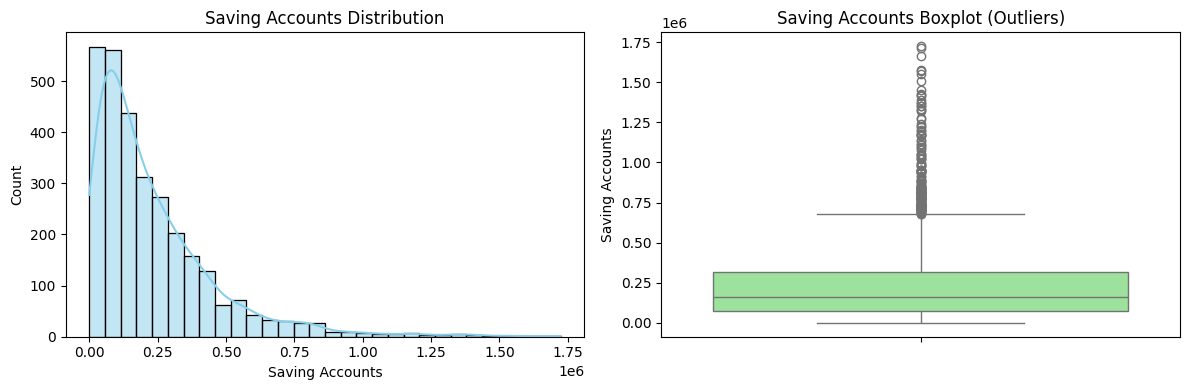

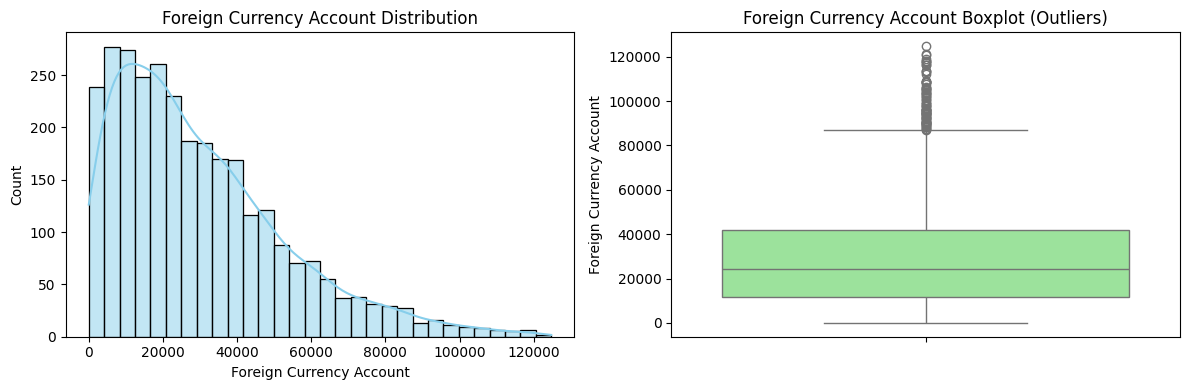

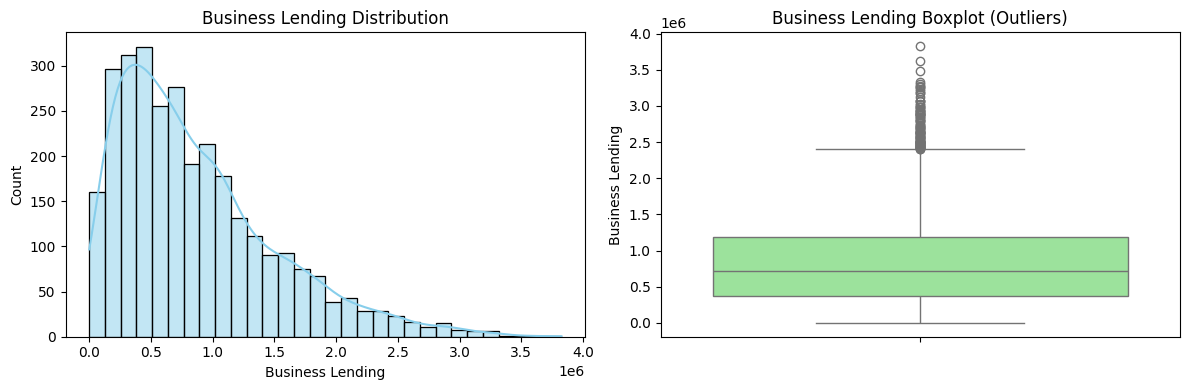

In [14]:
num_cols = ['Age','Estimated Income','Superannuation Savings','Credit Card Balance',
            'Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts',
            'Foreign Currency Account','Business Lending']
df[num_cols]

for col in num_cols:
    plt.figure(figsize=(12,4))
    
    # Distribution plot
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    
    # Box plot to check outliers
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot (Outliers)')
    
    plt.tight_layout()
    plt.show()

**Bivariate Analysis of each numerical column with respect to GenderId**

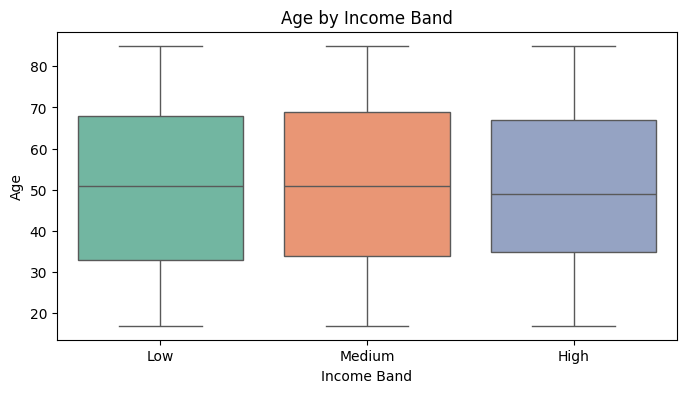

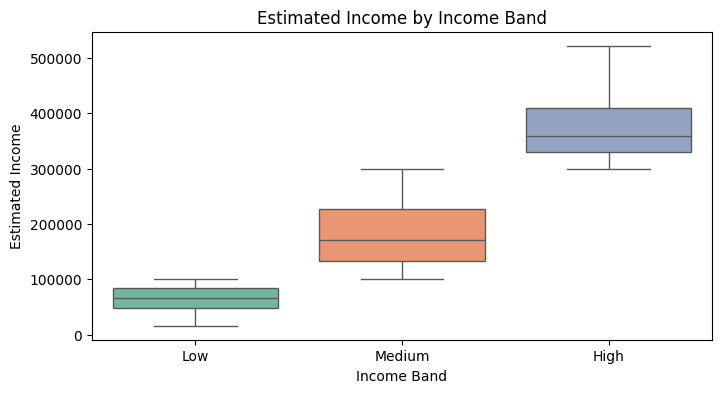

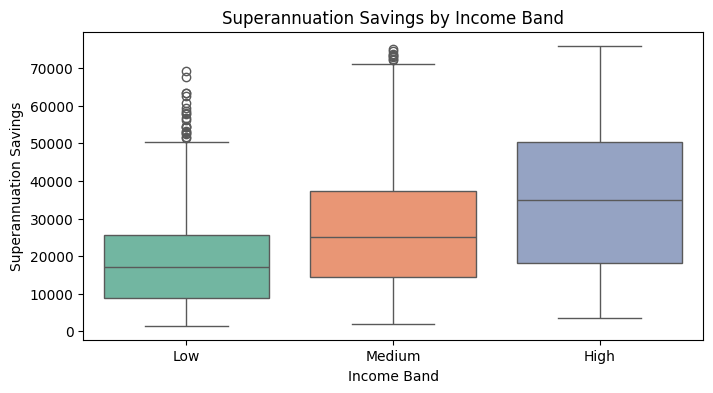

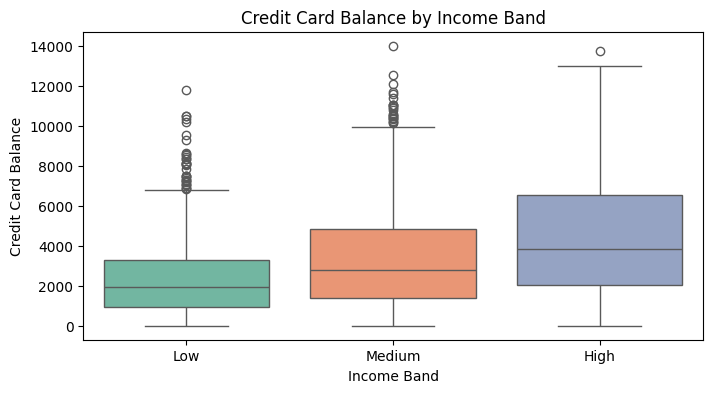

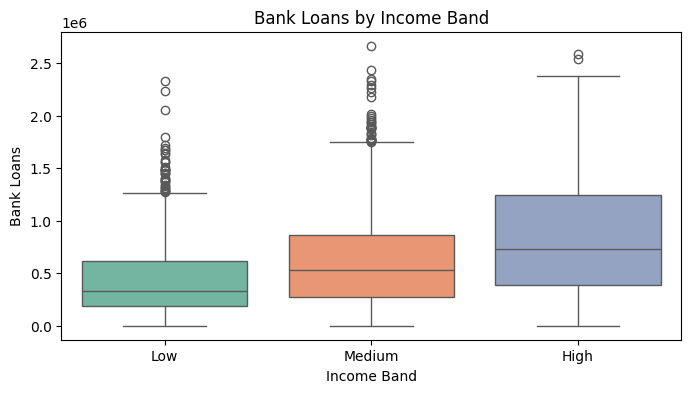

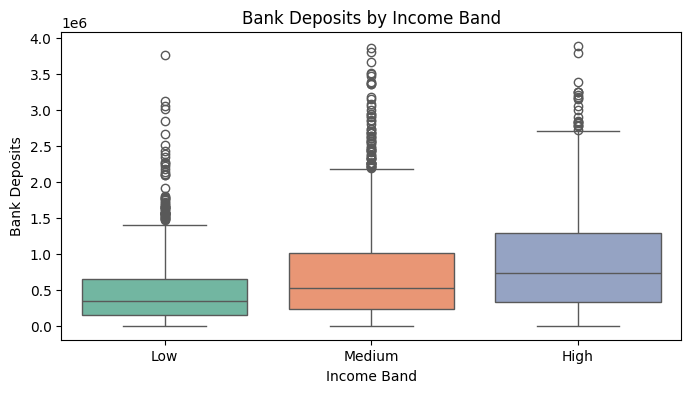

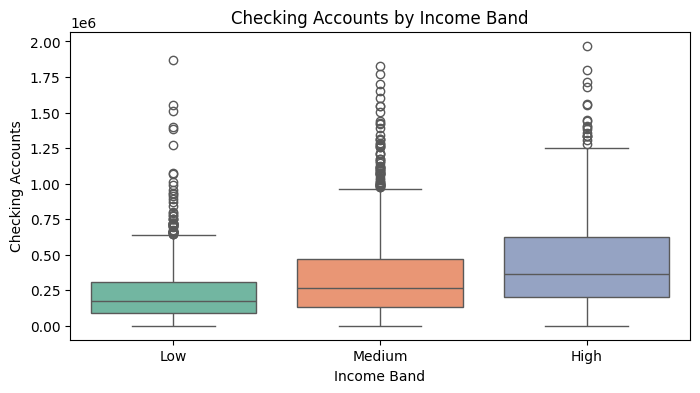

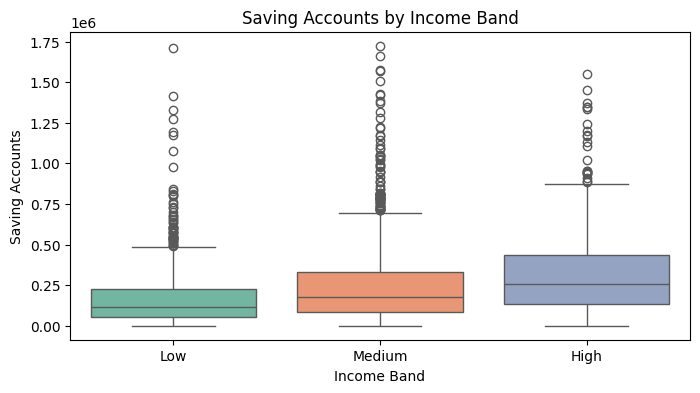

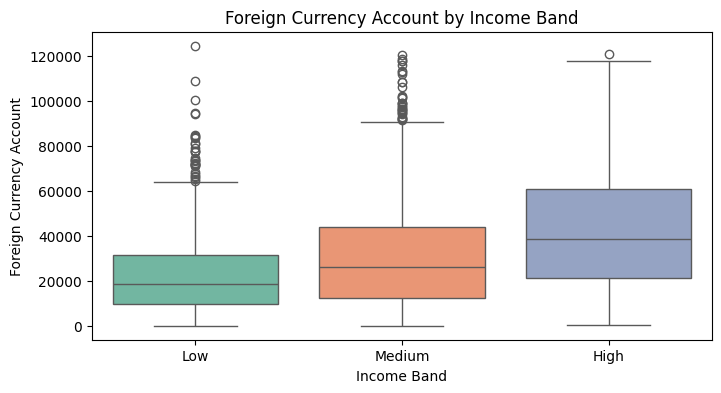

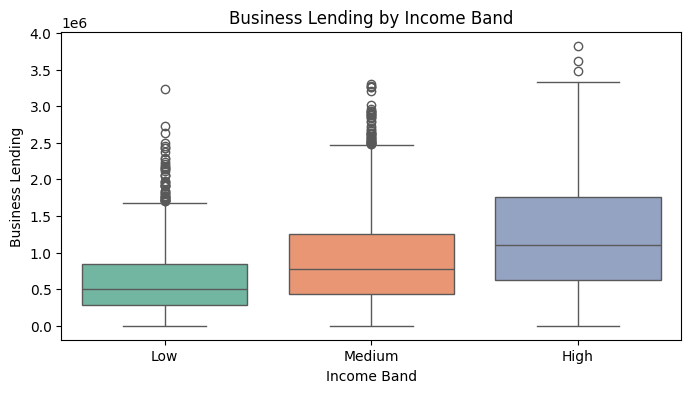

In [15]:
cat_col = 'Income Band'  # We can also try 'Income Band'

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=cat_col, y=col, data=df, hue=cat_col, palette='Set2')
    plt.title(f'{col} by {cat_col}')
    plt.show()


#**Correlation analysis between numerical variables**

In [16]:
num_cols = ['Age','Estimated Income','Superannuation Savings','Credit Card Balance',
            'Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts',
            'Foreign Currency Account','Business Lending']

# Correlation

df[num_cols].corr()


,Age,Estimated Income,Superannuation Savings,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending
Age,1.000000,-0.001682,-0.023504,0.003431,0.004773,-0.010725,-0.002896,0.001205,-0.024935,0.000129
Estimated Income,-0.001682,1.000000,0.374802,0.298527,0.329926,0.260332,0.291412,0.261299,0.306999,0.328531
Superannuation Savings,-0.023504,0.374802,1.000000,0.225562,0.241457,0.174084,0.198188,0.177132,0.228103,0.264919
Credit Card Balance,0.003431,0.298527,0.225562,1.000000,0.369509,0.383877,0.298672,0.284696,0.357720,0.351063
Bank Loans,0.004773,0.329926,0.241457,0.369509,1.000000,0.373155,0.292082,0.268882,0.364391,0.417095
Bank Deposits,-0.010725,0.260332,0.174084,0.383877,0.373155,1.000000,0.844278,0.754744,0.406347,0.441298
Checking Accounts,-0.002896,0.291412,0.198188,0.298672,0.292082,0.844278,1.000000,0.459509,0.312651,0.355904
Saving Accounts,0.001205,0.261299,0.177132,0.284696,0.268882,0.754744,0.459509,1.000000,0.311465,0.307550
Foreign Currency Account,-0.024935,0.306999,0.228103,0.357720,0.364391,0.406347,0.312651,0.311465,1.000000,0.369749
Business Lending,0.000129,0.328531,0.264919,0.351063,0.417095,0.441298,0.355904,0.307550,0.369749,1.000000


#**This will reveal relationships between numerical columns, e.g., whether higher Bank Deposits correlates with higher Estimated Income.**

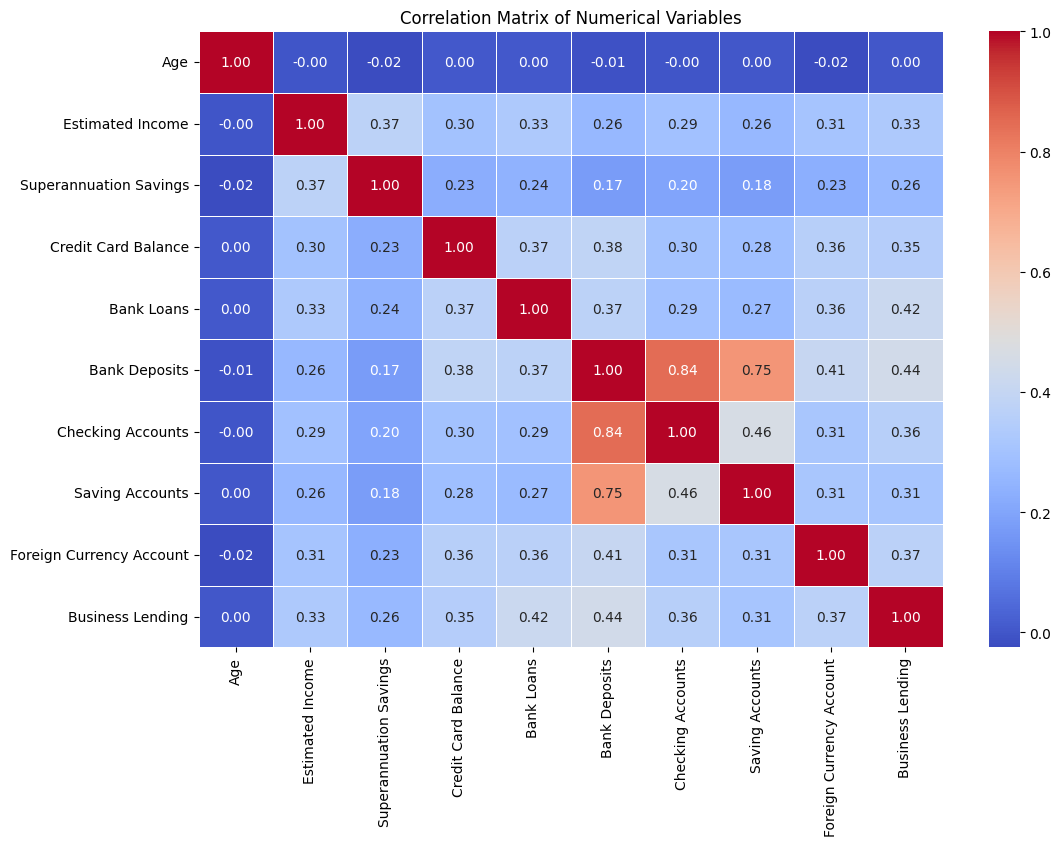

In [17]:
# HEAT MAP

plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


### Numerical Insights from Correlation Analysis

1. **Strong correlations among bank accounts:**
   - `Bank Deposits` & `Checking Accounts` (0.84)
   - `Bank Deposits` & `Saving Accounts` (0.75)
   
   > Clients with higher deposits also maintain higher checking and savings balances.

2. **Business lending patterns:**
   - `Business Lending` moderately correlates with `Bank Deposits` (0.44) and `Bank Loans` (0.42)
   
   > Indicates financially active clients with business investments.

3. **Credit Card usage:**
   - `Credit Card Balance` & `Bank Loans` (0.37)
   - `Credit Card Balance` & `Bank Deposits` (0.38)
   
   > Clients with higher credit card balances are likely to hold loans or deposits.

4. **Income vs savings & loans:**
   - `Estimated Income` & `Superannuation Savings` (0.37)
   - `Estimated Income` & `Bank Loans` (0.33)
   - `Estimated Income` & `Credit Card Balance` (0.30)
   
   > Higher-income clients save more and take larger loans/credit. --> obvious insight

5. **Foreign Currency Accounts:**
   - Moderate correlation with `Bank Loans` (0.36) and `Business Lending` (0.37)
   
   > Foreign currency clients are financially active in loans and business.

6. **Age factor:**
   - Negligible correlation with any financial variable
   
   > Age is not a key driver of banking activity in this dataset.


#**Top 10 correlated pairs**

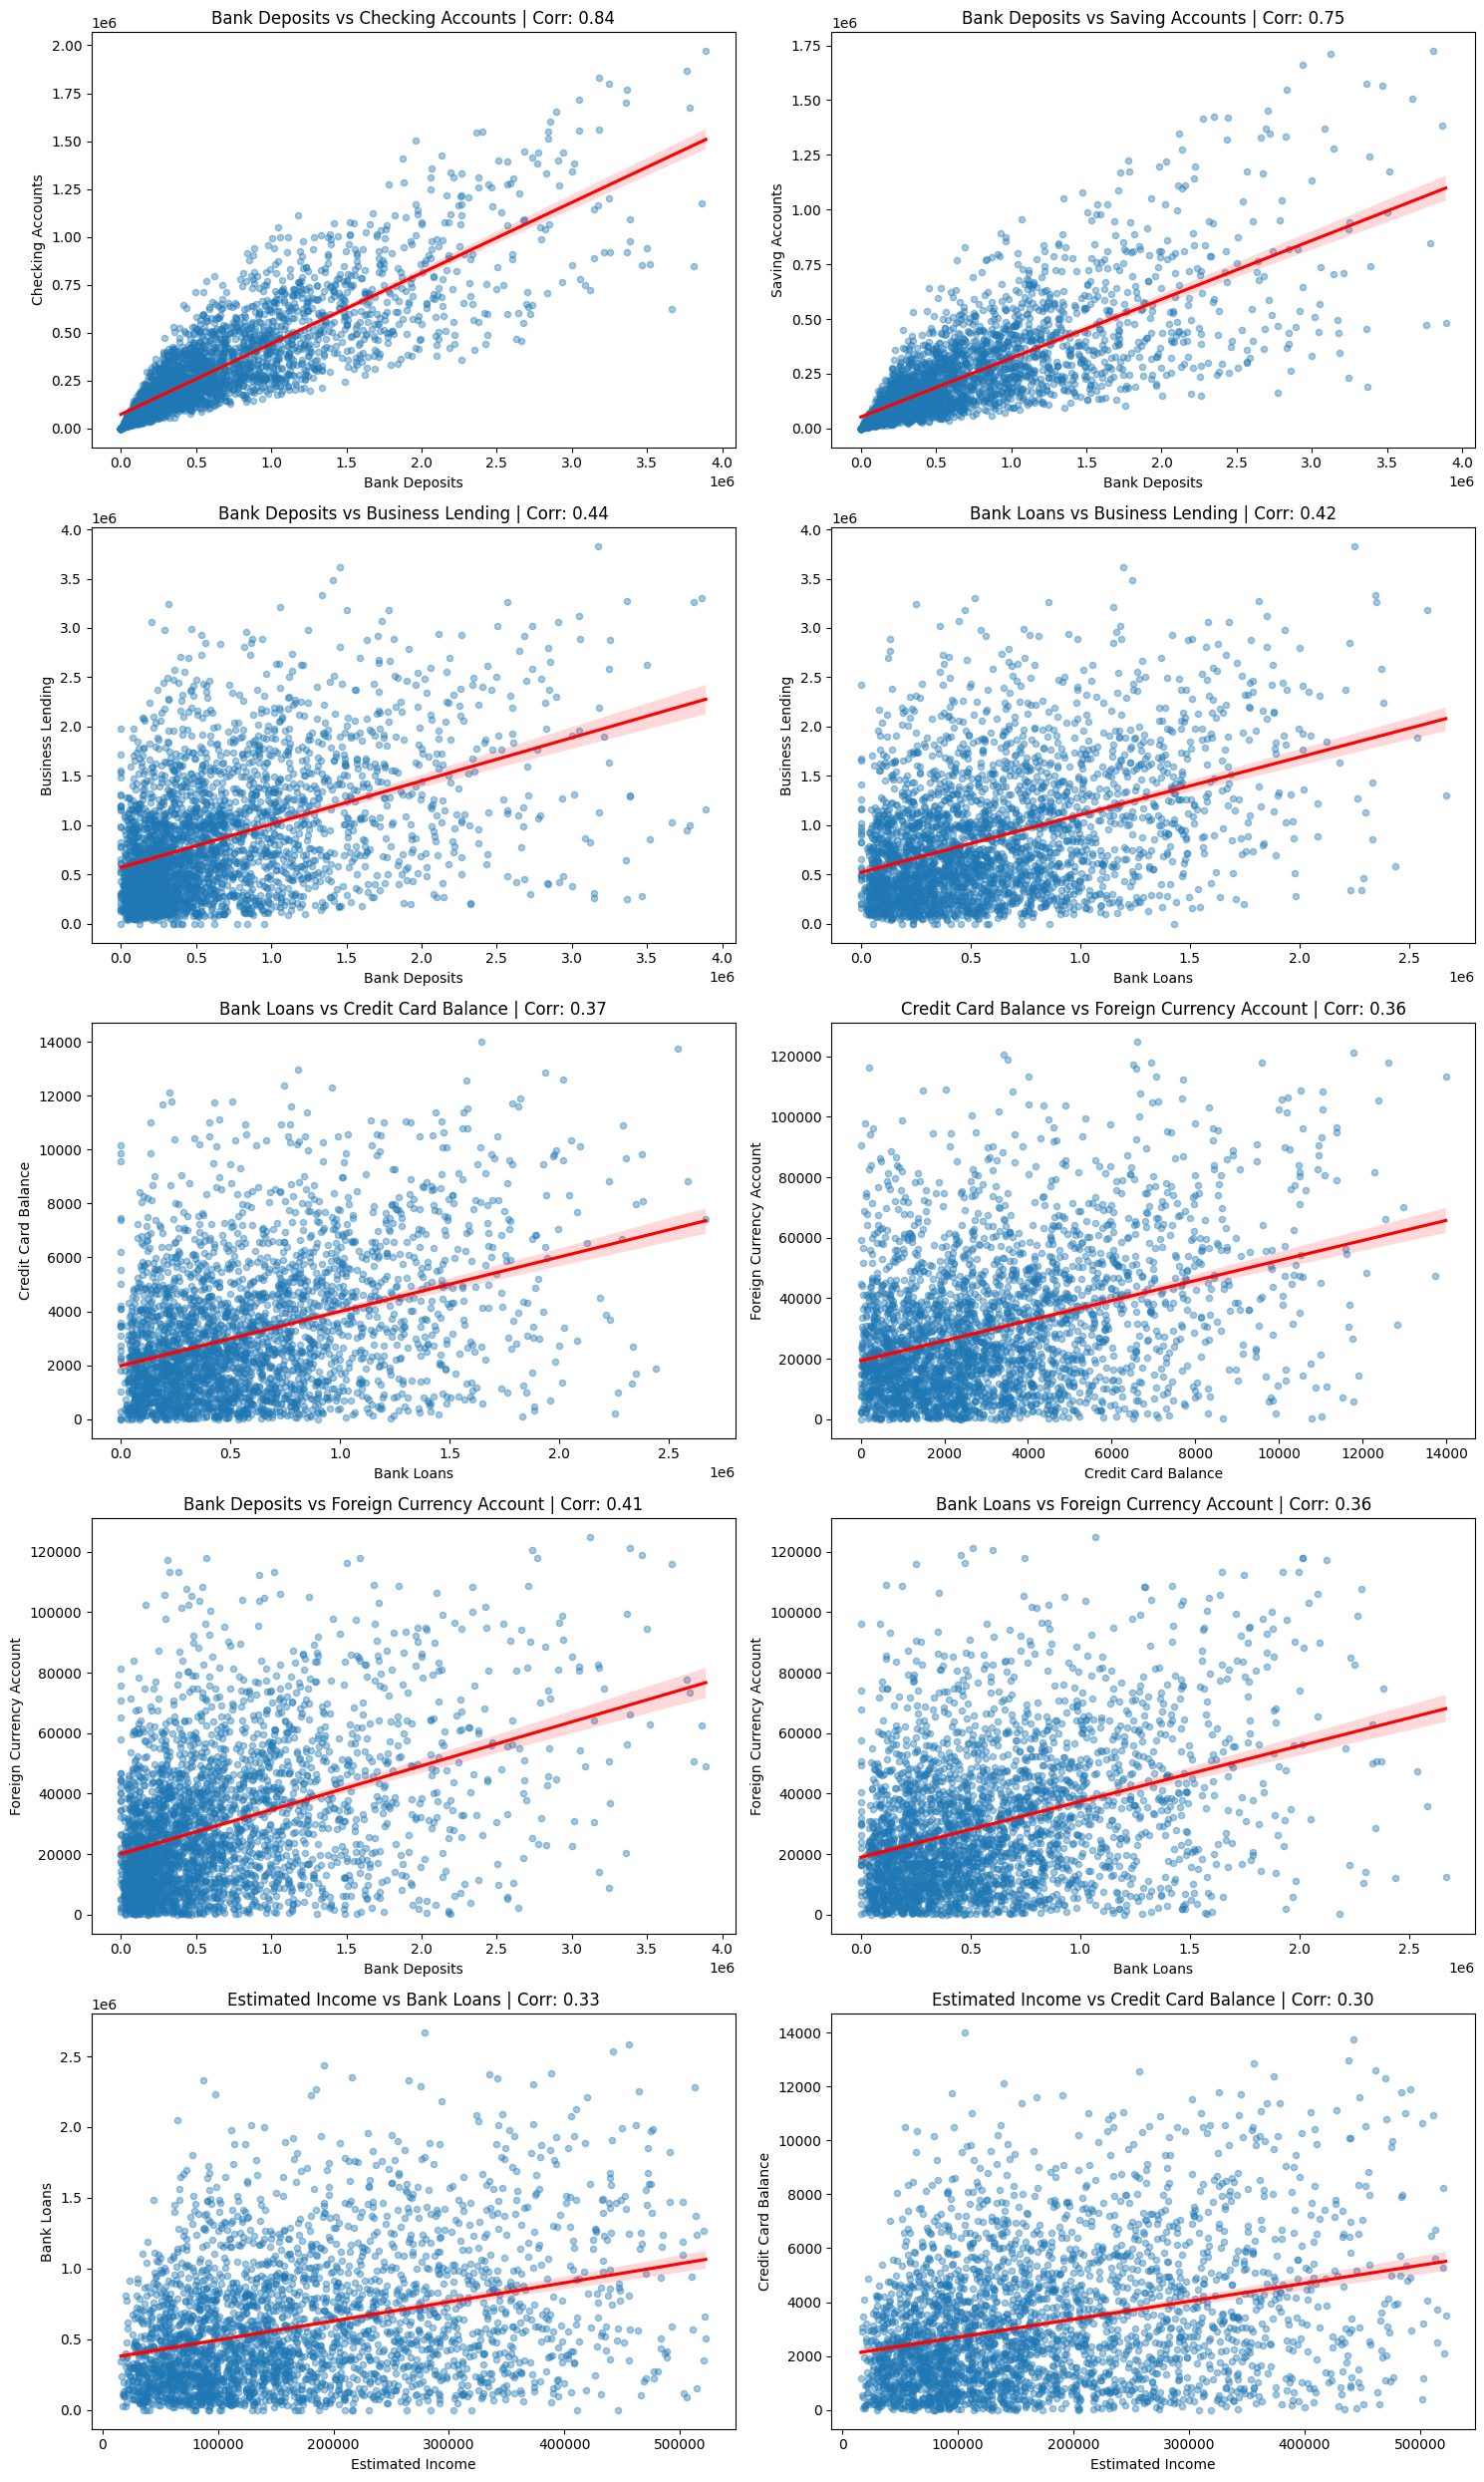

In [18]:
# Top 10 correlated pairs
top_pairs = [
    ('Bank Deposits', 'Checking Accounts'),
    ('Bank Deposits', 'Saving Accounts'),
    ('Bank Deposits', 'Business Lending'),
    ('Bank Loans', 'Business Lending'),
    ('Bank Loans', 'Credit Card Balance'),
    ('Credit Card Balance', 'Foreign Currency Account'),
    ('Bank Deposits', 'Foreign Currency Account'),
    ('Bank Loans', 'Foreign Currency Account'),
    ('Estimated Income', 'Bank Loans'),
    ('Estimated Income', 'Credit Card Balance')
]

plt.figure(figsize=(15, 25))

for i, (x_col, y_col) in enumerate(top_pairs, 1):
    plt.subplot(5, 2, i)
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'s':20, 'alpha': 0.4}, line_kws={'color':'red'})
    corr_value = df[x_col].corr(df[y_col])
    plt.title(f'{x_col} vs {y_col} | Corr: {corr_value:.2f}')
    plt.tight_layout()

plt.show()


### Key Insights from Numerical Analysis

1. **Bank Deposits and Checking Accounts** move together strongly—customers with more deposits usually have bigger checking account balances.  

2. **Bank Deposits and Saving Accounts** are also strongly linked—people who save more also tend to keep higher deposits.  

3. **Bank Deposits and Business Lending** show a positive connection—customers with bigger deposits often engage in more business loans.  

4. **Bank Loans and Business Lending** are closely related—those taking business loans tend to have higher overall bank loans.  

5. **Credit Card Balance and Bank Loans** are moderately connected—people with higher credit card debt also tend to have larger bank loans.  

6. **Credit Card Balance and Foreign Currency Account** are moderately correlated—customers with credit card debt sometimes also maintain foreign currency accounts.  

7. **Bank Loans and Foreign Currency Account** are positively linked—people with bigger loans often hold foreign currency accounts.  

8. **Estimated Income and Bank Loans** show a moderate correlation—higher income customers are more likely to take bank loans.  

9. **Estimated Income and Credit Card Balance** are somewhat connected—higher earners may carry larger credit card balances.  

10. **Bank Deposits and Foreign Currency Account** are positively associated—customers with bigger deposits often have foreign currency accounts.  



> 💡 **Overall:** Most correlations are intuitive—customers with higher financial activity in one area (deposits, loans, accounts) tend to be active in related areas too.

